In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

In [2]:
N_values = [50, 100, 200, 500, 1000, 2000]
mean_degree = 5
num_simulations = 500

In [3]:
def simulate_degrees(N, p, num_simulations):
    degrees = []
    for _ in range(num_simulations):
        G = nx.erdos_renyi_graph(N, p)
        degrees.extend([d for n, d in G.degree()])
    return np.array(degrees)


--- N=50, p=0.10204, expected mean degree=5.00 ---
Empirical mean: 5.026, Empirical variance: 4.431
Binomial variance: 4.490, Poisson variance: 5.000


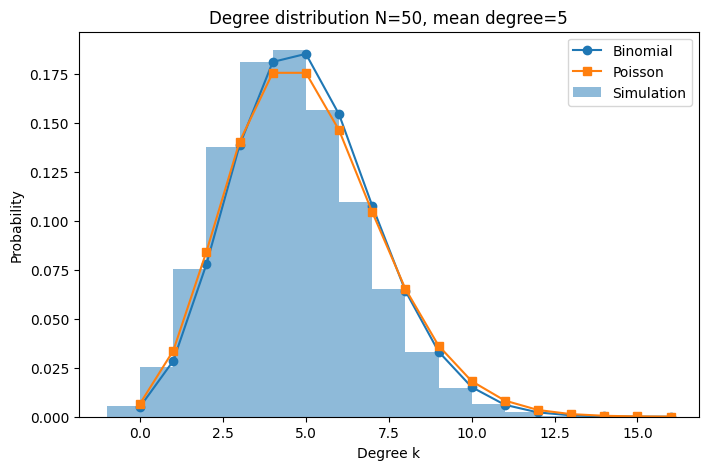


--- N=100, p=0.05051, expected mean degree=5.00 ---
Empirical mean: 5.010, Empirical variance: 4.740
Binomial variance: 4.747, Poisson variance: 5.000


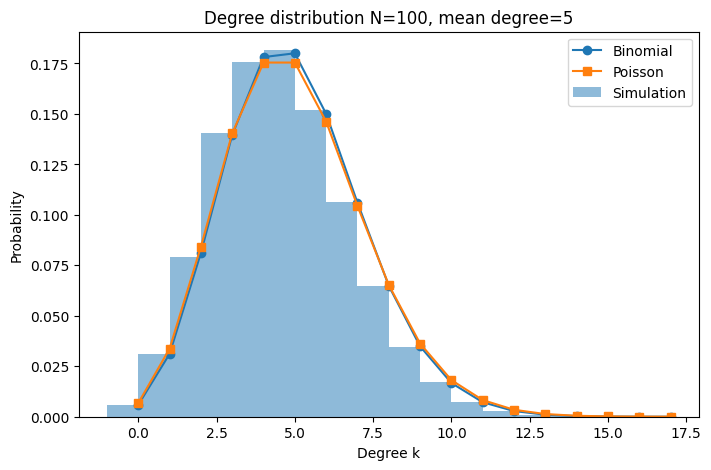


--- N=200, p=0.02513, expected mean degree=5.00 ---
Empirical mean: 4.989, Empirical variance: 4.857
Binomial variance: 4.874, Poisson variance: 5.000


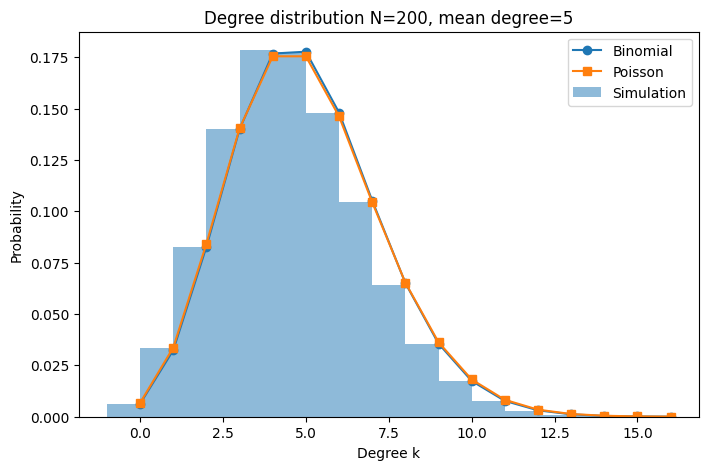


--- N=500, p=0.01002, expected mean degree=5.00 ---
Empirical mean: 4.991, Empirical variance: 4.929
Binomial variance: 4.950, Poisson variance: 5.000


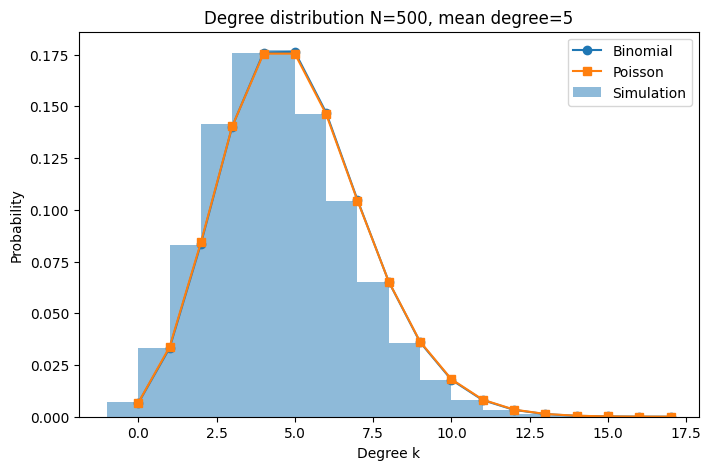


--- N=1000, p=0.00501, expected mean degree=5.00 ---
Empirical mean: 5.001, Empirical variance: 5.004
Binomial variance: 4.975, Poisson variance: 5.000


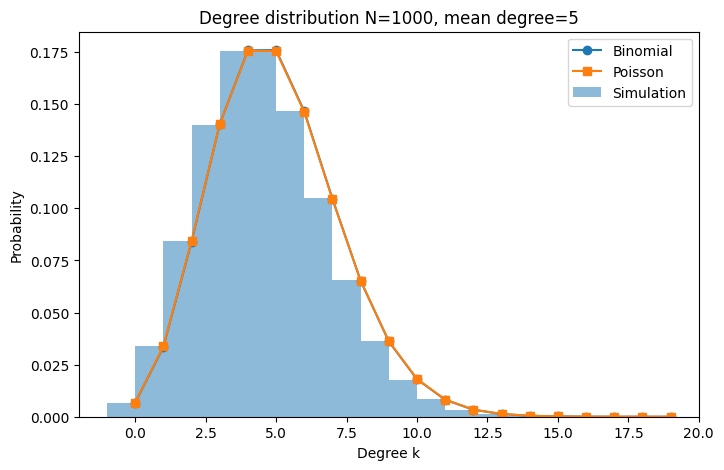


--- N=2000, p=0.00250, expected mean degree=5.00 ---
Empirical mean: 5.002, Empirical variance: 4.985
Binomial variance: 4.987, Poisson variance: 5.000


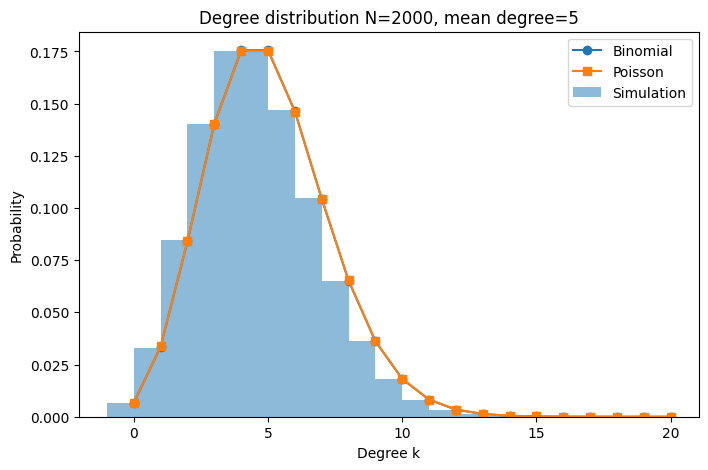

In [4]:
for N in N_values:
    p = mean_degree / (N-1) # constant mean
    print(f"\n--- N={N}, p={p:.5f}, expected mean degree={(N-1)*p:.2f} ---")
    
    sim_degrees = simulate_degrees(N, p, num_simulations)
    max_degree = sim_degrees.max()
    k_values = np.arange(0, max_degree+1)
    
    # empirical mean and variance
    empirical_mean = np.mean(sim_degrees)
    empirical_var = np.var(sim_degrees)
    
    # theoretical variance
    binom_var = (N-1)*p*(1-p)
    poisson_var = mean_degree  # lambda = mean
    
    print(f"Empirical mean: {empirical_mean:.3f}, Empirical variance: {empirical_var:.3f}")
    print(f"Binomial variance: {binom_var:.3f}, Poisson variance: {poisson_var:.3f}")
    
    # Histogram
    counts, bins = np.histogram(sim_degrees, bins=np.arange(-0.5, max_degree+1.5, 1), density=True)
    
    # binomial and poisson probabilities
    binom_probs = binom.pmf(k_values, N-1, p)
    poisson_probs = poisson.pmf(k_values, mean_degree)
    
    # plot
    plt.figure(figsize=(8,5))
    plt.bar(bins[:-1], counts, width=1, alpha=0.5, label='Simulation')
    plt.plot(k_values, binom_probs, 'o-', label='Binomial')
    plt.plot(k_values, poisson_probs, 's-', label='Poisson')
    plt.xlabel('Degree k')
    plt.ylabel('Probability')
    plt.title(f'Degree distribution N={N}, mean degree={mean_degree}')
    plt.legend()
    plt.show()